# Process Results

In [67]:
import numpy as np
import matplotlib.pyplot as plt

## Import Valid Data

In [68]:
'''
# One attacked model 
adv1 = np.load('four_subset_data_clean/adv_three_1.csv.npy')
adv2 = np.load('four_subset_data_clean/adv_three_2.csv.npy')
adv3 = np.load('four_subset_data_clean/adv_three_3.csv.npy')

# Two attacked models 
adv12 = np.load('four_subset_data_clean/adv_three_12.csv.npy')
adv13 = np.load('four_subset_data_clean/adv_three_13.csv.npy')
adv23 = np.load('four_subset_data_clean/adv_three_23.csv.npy')

# Three attacked models
adv123 = np.load('four_subset_data_clean/adv_three_123.csv.npy')
'''
# One attacked model 
adv1 = np.load('four_subset_data_clean/adv_three_1.csv.npy')
adv2 = np.load('four_subset_data_clean/adv_three_2.csv.npy')
adv3 = np.load('four_subset_data_clean/adv_three_3.csv.npy')

# Two attacked models 
adv12 = np.load('four_subset_data_clean/adv_three_12.csv.npy')
adv13 = np.load('four_subset_data_clean/adv_three_13.csv.npy')
adv23 = np.load('four_subset_data_clean/adv_three_23.csv.npy')

# Three attacked models
adv123 = np.load('four_subset_data_clean/adv_three_123.csv.npy')

In [69]:
# One attacked model 
inp1 = np.load('four_subset_data_clean/inputs_three__1.csv.npy')
inp2 = np.load('four_subset_data_clean/inputs_three__2.csv.npy')
inp3 = np.load('four_subset_data_clean/inputs_three__3.csv.npy')

# Two attacked models 
inp12 = np.load('four_subset_data_clean/inputs_three__12.csv.npy')
inp13 = np.load('four_subset_data_clean/inputs_three__13.csv.npy')
inp23 = np.load('four_subset_data_clean/inputs_three__23.csv.npy')

# Three attacked models
inp123 = np.load('four_subset_data_clean/inputs_three__123.csv.npy')

In [71]:
one_attack = [adv1, adv2, adv3]
two_attack = [adv12, adv13, adv23]
three_attack = [adv123]

one_attack_inp = [inp1, inp2, inp3]
two_attack_inp = [inp12, inp13, inp23]
three_attack_inp = [inp123]

## Find & Plot Attack Size Differences for Varied M & N 

### M = Number attacked
### N = Number defended

In [13]:
import tensorflow as tf
import tensorflow.keras.backend as K
from keras.models import load_model, Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten

Using TensorFlow backend.


In [14]:
sess = tf.Session(config=tf.ConfigProto())
K.set_session(sess)

# CNN Model for MNIST 
class MNIST_Model:
    def __init__(self, session=None):
        self.num_channels = 1
        self.image_size = 28
        self.num_labels = 10

        model = Sequential()

        model.add(Conv2D(32, (3, 3),
                         input_shape=(28, 28, 1)))
        model.add(Activation('relu'))
        model.add(Conv2D(32, (3, 3)))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Conv2D(64, (3, 3)))
        model.add(Activation('relu'))
        model.add(Conv2D(64, (3, 3)))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Flatten())
        model.add(Dense(200))
        model.add(Activation('relu'))
        model.add(Dense(200))
        model.add(Activation('relu'))
        model.add(Dense(10))

        self.model = model

    def predict(self, data):
        return self.model(data)
    
def fn(correct, predicted):
    return tf.nn.softmax_cross_entropy_with_logits(labels=correct,
                                                   logits=predicted)

In [15]:
model1 = MNIST_Model()
model1.model = load_model('models/trained_model1', custom_objects={'fn':fn})

model2 = MNIST_Model()
model2.model = load_model('models/trained_model2', custom_objects={'fn':fn})

model3 = MNIST_Model()
model3.model = load_model('models/trained_model3', custom_objects={'fn':fn})

model4 = MNIST_Model()
model4.model = load_model('models/trained_model4', custom_objects={'fn':fn})


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.




In [75]:
def size_of_attack(adv, inputs, num_img=10):
    perturb = adv - inputs
    perturb_mean =  np.sum(perturb) / num_img 
    perturb_std = np.std(np.array([sum(x) for x in perturb]))
    return (perturb_mean, perturb_std)

In [76]:
num_one_attack = 4
num_two_attack = 6
num_three_attack = 4
mean_attack = []
std_attack = []

# M = 1
mean = 0
var = 0
for i in range(len(one_attack)):
    res = size_of_attack(one_attack[i], one_attack_inp[i])
    mean += res[0]
    var += res[1] ** 2
mean_attack.append(mean / num_one_attack)
std_attack.append(np.sqrt(var))

# M = 2
mean = 0
var = 0
for i in range(len(two_attack)):
    res = size_of_attack(two_attack[i], two_attack_inp[i])
    mean += res[0]
    var += res[1] ** 2
mean_attack.append(mean / num_two_attack)
std_attack.append(np.sqrt(var))

# M = 3
mean = 0
var = 0
for i in range(len(three_attack)):
    res = size_of_attack(three_attack[i], three_attack_inp[i])
    mean += res[0]
    var += res[1] ** 2
mean_attack.append(mean/ num_three_attack)
std_attack.append(np.sqrt(var))

In [77]:
print(mean_attack)
print(std_attack)

[6.739913368225097, 3.608103815714518, 1.9042753219604491]
[1.4055796240953198, 1.5169285978283171, 0.824033260345459]


In [78]:
def get_label_probabilities(image, model):
    pr = model.predict(image)
    pr = np.array([np.exp(x) for x in pr])
    return pr / np.sum(pr)

def avg_probability(adv, model):
    pr_true_avg = 0
    for i in range(0, len(adv)):
        pr_true_avg += get_label_probabilities(adv[i][np.newaxis, ...], model)[0][0]
    return pr_true_avg / len(adv)

In [79]:
mean_transferability = []

mean = 0
for adv in one_attack:
    mean += avg_probability(adv, model4.model)
mean_transferability.append(mean / len(one_attack))

mean = 0
for adv in two_attack:
    mean += avg_probability(adv, model4.model)
mean_transferability.append(mean / len(two_attack))

mean = 0
for adv in three_attack:
    mean += avg_probability(adv, model4.model)
mean_transferability.append(mean / len(three_attack))

In [80]:
mean_transferability

[0.8361366341263056, 0.6002542709729944, 0.31698752942378633]

In [81]:
difference_transferability = []

mean = 0
for i in range(len(one_attack)):
    mean += avg_probability(one_attack_inp[i], model4.model) - avg_probability(one_attack[i], model4.model)
difference_transferability.append(mean / len(one_attack))

mean = 0
for i in range(len(two_attack)):
    mean += avg_probability(two_attack_inp[i], model4.model) - avg_probability(two_attack[i], model4.model)
difference_transferability.append(mean / len(two_attack))

mean = 0
for i in range(len(three_attack)):
    mean += avg_probability(three_attack_inp[i], model4.model) - avg_probability(three_attack[i], model4.model)
difference_transferability.append(mean / len(three_attack))

In [82]:
difference_transferability

[0.16385200999677185, 0.39973437315008303, 0.6830011146992911]

In [83]:
plt.set_cmap('Greys_r')
plt.style.use('seaborn-dark-palette')
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

## Plot Magnitude vs M, N

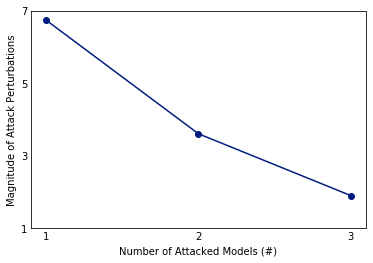

In [104]:
from matplotlib.ticker import (AutoLocator, AutoMinorLocator)

M = [1, 2, 3]
N = [2, 1, 0]

plt.plot(M, mean_attack, linestyle='-', marker='o')
plt.xticks(M, ['1', '2', '3'])
plt.yticks([1.0, 3.0, 5.0, 7.0])
plt.xlabel('Number of Attacked Models (#)')
plt.ylabel('Magnitude of Attack Perturbations')
ax = plt.gca()
ax.tick_params(axis=u'both', which=u'both',length=0)
fig = plt.gcf()
plt.show()
fig.savefig('magnitude_of_attack_three.png')

## Transferability of Attack vs M, N

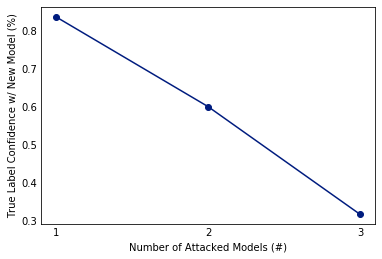

In [105]:
M = [1, 2, 3]
plt.plot(M, mean_transferability, linestyle='-', marker='o')
plt.xticks(M, ['1', '2', '3'])
plt.xlabel('Number of Attacked Models (#)')
plt.ylabel('True Label Confidence w/ New Model (%)')
ax = plt.gca()
ax.tick_params(axis=u'both', which=u'both',length=0)
fig = plt.gcf()
plt.show()

fig.savefig('true_label_confidence_three.png')

In [86]:
def plot_adversarial(inputs, adv, num):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    ax2.axis('off')
    ax2.imshow(inputs[0][:,:,0])
    ax1.axis('off')
    ax1.imshow(adv[0][:,:,0])
    ax3.axis('off')
    ax3.imshow(adv[0][:,:,0] - inputs[0][:,:,0])
    ax1.margins(0,0)
    ax2.margins(0,0)
    ax3.margins(0,0)
    fig.savefig(str(num) + '_attack_example.pdf', bbox_inches = 'tight', pad_inches = 0)

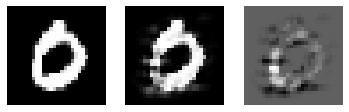

In [87]:
plot_adversarial(adv1, inp1, 1)

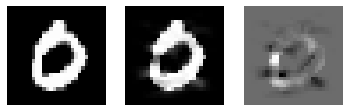

In [88]:
plot_adversarial(adv23, inp23, 2)

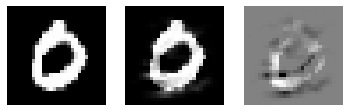

In [89]:
plot_adversarial(adv123, inp123, 3)

# Compute Probabilities of Successful Attack

In [2]:
import numpy as np
'''
# One attacked model 
adv1 = np.load('four_subset_data/adv_three_1.csv.npy')
adv2 = np.load('four_subset_data/adv_three_2.csv.npy')
adv3 = np.load('four_subset_data/adv_three_3.csv.npy')

# Two attacked models 
adv12 = np.load('four_subset_data/adv_three_12.csv.npy')
adv13 = np.load('four_subset_data/adv_three_13.csv.npy')
adv23 = np.load('four_subset_data/adv_three_23.csv.npy')

# Three attacked models
adv123 = np.load('four_subset_data/adv_three_123.csv.npy')
'''
# One attacked model 
adv1 = np.load('three_subset_data/adv_precise_1.csv.npy')
adv2 = np.load('three_subset_data/adv_precise_2.csv.npy')
adv3 = np.load('three_subset_data/adv_precise_3.csv.npy')

# Two attacked models 
adv12 = np.load('three_subset_data/adv_precise_12.csv.npy')
adv13 = np.load('three_subset_data/adv_precise_13.csv.npy')
adv23 = np.load('three_subset_data/adv_precise_23.csv.npy')

# Three attacked models
adv123 = np.load('three_subset_data/adv_precise_123.csv.npy')

In [3]:
'''
# One attacked model 
inp1 = np.load('four_subset_data/inputs_three__1.csv.npy')
inp2 = np.load('four_subset_data/inputs_three__2.csv.npy')
inp3 = np.load('four_subset_data/inputs_three__3.csv.npy')

# Two attacked models 
inp12 = np.load('four_subset_data/inputs_three__12.csv.npy')
inp13 = np.load('four_subset_data/inputs_three__13.csv.npy')
inp23 = np.load('four_subset_data/inputs_three__23.csv.npy')

# Three attacked models
inp123 = np.load('four_subset_data/inputs_three__123.csv.npy')
'''
# One attacked model 
inp1 = np.load('three_subset_data/inputs_precise__1.csv.npy')
inp2 = np.load('three_subset_data/inputs_precise__2.csv.npy')
inp3 = np.load('three_subset_data/inputs_precise__3.csv.npy')

# Two attacked models 
inp12 = np.load('three_subset_data/inputs_precise__12.csv.npy')
inp13 = np.load('three_subset_data/inputs_precise__13.csv.npy')
inp23 = np.load('three_subset_data/inputs_precise__23.csv.npy')

# Three attacked models
inp123 = np.load('three_subset_data/inputs_precise__123.csv.npy')

In [4]:
one_attack = [adv1, adv2, adv3]
two_attack = [adv12, adv13, adv23]
three_attack = [adv123]

In [5]:
targets = np.load('three_subset_data/targets_precise_1.csv.npy')
targets2 = np.load('three_subset_data/targets2_precise_1.csv.npy')
targets3 = np.load('three_subset_data/targets3_precise_1.csv.npy')

In [6]:
def get_label_confidence(image, model):
    pr = model.predict(image)
    pr = np.array([np.exp(x) for x in pr])
    pr = pr / np.sum(pr)
    image_class = model.predict_classes(image)
    return image_class[0], max(max(pr))

In [7]:
def attack_evaluation(num_img, adv, num_models):
    l = []
    for i in range(0, num_img):
        res = [get_label_confidence(adv[i][np.newaxis, ...], model1.model), get_label_confidence(adv[i][np.newaxis, ...], model2.model), get_label_confidence(adv[i][np.newaxis, ...], model3.model)]
        l.append(res)
    return l

In [8]:
targets = np.nonzero(targets)[1]
targets2 = np.nonzero(targets2)[1]
targets3 = np.nonzero(targets3)[1]

def check_correct_precise(subset, num_img, adv, num_models, targets, targets2, targets3, true_label=0):
    l = attack_evaluation(num_img, adv, num_models)
    correct = []
    for idx, res in enumerate(l):
        if subset == '1':
            output = True if res[0][0] == targets[idx] and res[1][0] == true_label and res[2][0] == true_label else False
        elif subset == '2':
            output = True if res[0][0] == true_label and res[1][0] == targets2[idx] and res[2][0] == true_label else False
        elif subset == '3':
            output = True if res[0][0] == true_label and res[1][0] == true_label and res[2][0] == targets3[idx] else False
        elif subset == '12':
            output = True if res[0][0] == targets[idx] and res[1][0] == targets2[idx] and res[2][0] == true_label else False
        elif subset == '13':
            output = True if res[0][0] == targets[idx] and res[1][0] == true_label and res[2][0] == targets3[idx] else False
        elif subset == '23':
            output = True if res[0][0] == true_label and res[1][0] == targets2[idx] and res[2][0] == targets3[idx] else False
        elif subset == '123':
            output = True if res[0][0] == targets[idx] and res[1][0] == targets2[idx] and res[2][0] == targets3[idx] else False
            
        if output:
            correct.append(l.index(res))
    return correct

In [9]:
def check_correct(subset, num_img, adv, num_models, target_label=9, true_label=0):
    l = attack_evaluation(num_img, adv, num_models)
    correct = []
    for res in l:
        if subset == '1':
            output = True if res[0][0] == target_label and res[1][0] == true_label and res[2][0] == true_label else False
        elif subset == '2':
            output = True if res[0][0] == true_label and res[1][0] == target_label and res[2][0] == true_label else False
        elif subset == '3':
            output = True if res[0][0] == true_label and res[1][0] == true_label and res[2][0] == target_label else False
        elif subset == '12':
            output = True if res[0][0] == target_label and res[1][0] == target_label and res[2][0] == true_label else False
        elif subset == '13':
            output = True if res[0][0] == target_label and res[1][0] == true_label and res[2][0] == target_label else False
        elif subset == '23':
            output = True if res[0][0] == true_label and res[1][0] == target_label and res[2][0] == target_label else False
        elif subset == '123':
            output = True if res[0][0] == target_label and res[1][0] == target_label and res[2][0] == target_label else False
            
        if output:
            correct.append(l.index(res))
    return correct

In [10]:
from numpy import savetxt

def save_results(inputs, adv, subset_attacked):
    np.save('three_subset_data_clean/inputs__' + subset_attacked + '.csv', inputs)
    np.save('three_subset_data_clean/adv_' + subset_attacked + '.csv', adv)

In [16]:
correct1 = []
total_correct = 0
for i in range(len(one_attack)):
    correct1.append(check_correct_precise(str(i+1), 25, one_attack[i], 3, targets, targets2, targets3))
for elem in correct1: 
    total_correct += len(elem)    
print(total_correct / 75)

0.3466666666666667


In [19]:
correct2 = []
total_correct = 0
correct2.append(check_correct_precise('12', 25, adv12, 3, targets, targets2, targets3))
correct2.append(check_correct_precise('13', 25, adv13, 3, targets, targets2, targets3))
correct2.append(check_correct_precise('23', 25, adv23, 3, targets, targets2, targets3))
for elem in correct2: 
    total_correct += len(elem)
print(total_correct / 75)

0.013333333333333334


In [21]:
correct3 = []
total_correct = 0
correct3.append(check_correct_precise('123', 25, adv123, 3, targets, targets2, targets3))
for elem in correct3: 
    total_correct += len(elem)
print(total_correct / 25)

0.2


In [53]:
s1 = set(set(correct1[0]) & set(correct1[1]) & set(correct1[2]))
s2 = set(set(correct2[0]) & set(correct2[1]) & set(correct2[2]))
s3 = set(correct3[0])

print(s1 & s2 & s3)

{0, 2, 10, 12, 22}


In [62]:
def save_correct(inp, adv, subset, correct):
    i = []
    a = []
    for elem in correct:
        i.append(inp[elem])
        a.append(adv[elem])
    i = np.array(i)
    a = np.array(i)
    save_results(inp, adv, subset)

In [66]:
# One Attacked
save_correct(inp1, adv1, '1', correct1[0])
save_correct(inp2, adv2, '2', correct1[1])
save_correct(inp3, adv3, '3', correct1[2])

# Two Attacked
save_correct(inp12, adv12, '12', correct2[0])
save_correct(inp13, adv13, '13', correct2[1])
save_correct(inp23, adv23, '23', correct2[2])

# Three Attacked
save_correct(inp123, adv123, '123', correct3[0])